In [2]:
%cd ../

/home/qwj/code/HippoRAG


In [3]:
import pandas as pd

In [4]:
def recall_dict_to_columns(row):
    for k, v in row['recall'].items():
        row[f'recall@{k}'] = v
    return row


In [5]:
contriever_entity_path = "output/ircot/ircot_results_musique_hipporag_facebook_contriever_demo_1_gpt-3_5-turbo-1106_no_ensemble_step_1_top_10_sim_thresh_0.8_damping_0.5.json"

result1 = pd.read_json(contriever_entity_path)
# 使用 apply 函数将 recall 字典转换为单独的列，并更新原 DataFrame
result1 = result1.apply(recall_dict_to_columns, axis=1).drop('recall', axis=1)
result1.head()

,id,question,question_decomposition,answer,answer_aliases,answerable,supporting_docs,retrieved,retrieved_scores,nodes_in_gold_doc,...,recall@2,recall@5,recall@10,recall@15,recall@20,recall@30,recall@40,recall@50,recall@80,recall@100
0,2hop__13548_13529,When was the person who Messi's goals in Copa ...,"[{'id': 13548, 'question': 'To whom was Messi'...",June 1982,[],True,"[{'idx': 1, 'title': 'FC Barcelona', 'paragrap...",[FC Barcelona\nBarcelona won the treble in the...,"[1.0, 0.816935175872005, 0.7618691370150441, 0...","[[messi, real madrid, barcelona, ronaldinho, l...",...,0.5,0.5,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000,0.5000
1,3hop1__9285_5188_23307,What month did the Tripartite discussions begi...,"[{'id': 9285, 'question': 'What was the nobili...",mid-June,[],True,"[{'idx': 2, 'title': 'Szlachta', 'paragraph_te...","[Warsaw Pact\nOn 25 February 1991, the Warsaw ...","[1.0, 0.8889851232086511, 0.674061955666957, 0...","[[old royal dynasty, polish king, king, poland...",...,0.0,0.0,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333,0.3333
2,2hop__766973_770570,What county is Erik Hort's birthplace a part of?,"[{'id': 766973, 'question': 'Erik Hort >> plac...",Rockland County,"[Rockland County, New York]",True,"[{'idx': 4, 'title': 'Montebello, New York', '...","[Erik Hort\nErik Hort (born February 16, 1987 ...","[1.0, 0.038859128696890004, 0.0341903591153410...","[[erik hort], [montebello]]",...,1.0,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,2hop__170823_120171,What year did the publisher of Labyrinth end?,"[{'id': 170823, 'question': 'Labyrinth >> publ...",1986,[],True,"[{'idx': 2, 'title': 'Acornsoft', 'paragraph_t...",[Labyrinth (1984 video game)\nLabyrinth is a v...,"[1.0, 0.064486609080106, 0.048974985868645, 0....","[[topologika, superior software, view family,...",...,0.5,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,2hop__511454_120259,When was Lady Godiva's birthplace abolished?,"[{'id': 511454, 'question': 'Lady Godiva >> pl...",918,[],True,"[{'idx': 4, 'title': 'Mercia', 'paragraph_text...",[Lady Godiva Rides Again\nThe film is most not...,"[1.0, 0.089002782062102, 0.046960519085966004,...","[[norman conquest of england, godiva, leofric,...",...,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [27]:
result1['supporting_docs'][0][0]

{'idx': 1,
 'title': 'FC Barcelona',
 'paragraph_text': "Despite being the favourites and starting strongly, Barcelona finished the 2006–07 season without trophies. A pre-season US tour was later blamed for a string of injuries to key players, including leading scorer Eto'o and rising star Lionel Messi. There was open feuding as Eto'o publicly criticized coach Frank Rijkaard and Ronaldinho. Ronaldinho also admitted that a lack of fitness affected his form. In La Liga, Barcelona were in first place for much of the season, but inconsistency in the New Year saw Real Madrid overtake them to become champions. Barcelona advanced to the semi-finals of the Copa del Rey, winning the first leg against Getafe 5–2, with a goal from Messi bringing comparison to Diego Maradona's goal of the century, but then lost the second leg 4–0. They took part in the 2006 FIFA Club World Cup, but were beaten by a late goal in the final against Brazilian side Internacional. In the Champions League, Barcelona were

In [6]:
result1[[f'recall@{k}' for k in [2, 5, 10, 100]]].mean()

recall@2      0.411913
recall@5      0.514664
recall@10     0.581832
recall@100    0.581832
dtype: float64

In [7]:
contriever_entity_path = "output/ircot_v2/ircot_results_musique_hipporag_facebook_contriever_demo_1_gpt-3_5-turbo-1106_no_ensemble_step_1_top_10_sim_thresh_0.8_damping_0.5.json"

result2 = pd.read_json(contriever_entity_path)
result2 = result2.apply(recall_dict_to_columns, axis=1).drop('recall', axis=1)
result2.head()

,id,question,question_decomposition,answer,answer_aliases,answerable,supporting_docs,retrieved,retrieved_scores,nodes_in_gold_doc,...,recall@2,recall@5,recall@10,recall@15,recall@20,recall@30,recall@40,recall@50,recall@80,recall@100
0,2hop__13548_13529,When was the person who Messi's goals in Copa ...,"[{'id': 13548, 'question': 'To whom was Messi'...",June 1982,[],True,"[{'idx': 1, 'title': 'FC Barcelona', 'paragrap...",[FC Barcelona\nBarcelona won the treble in the...,"[1.0, 0.8184323130422451, 0.762426872675917, 0...","[[copa del rey, european cup final, terry vena...",...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,3hop1__9285_5188_23307,What month did the Tripartite discussions begi...,"[{'id': 9285, 'question': 'What was the nobili...",mid-June,[],True,"[{'idx': 2, 'title': 'Szlachta', 'paragraph_te...",[Economy of the United States\nThe nation's ec...,"[1.0, 0.916536414034218, 0.837587699541933, 0....","[[ussr, chief of combined staff, supreme comma...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2hop__766973_770570,What county is Erik Hort's birthplace a part of?,"[{'id': 766973, 'question': 'Erik Hort >> plac...",Rockland County,"[Rockland County, New York]",True,"[{'idx': 4, 'title': 'Montebello, New York', '...","[Erik Hort\nErik Hort (born February 16, 1987 ...","[1.0, 0.43715144400416106, 0.437090245316315, ...","[[montebello], [erik hort]]",...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,2hop__170823_120171,What year did the publisher of Labyrinth end?,"[{'id': 170823, 'question': 'Labyrinth >> publ...",1986,[],True,"[{'idx': 2, 'title': 'Acornsoft', 'paragraph_t...",[Labyrinth (1984 video game)\nLabyrinth is a v...,"[1.0, 0.12234160710668401, 0.084683269255136, ...","[[acornsoft, labyrinth], [topologika, superior...",...,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2hop__511454_120259,When was Lady Godiva's birthplace abolished?,"[{'id': 511454, 'question': 'Lady Godiva >> pl...",918,[],True,"[{'idx': 4, 'title': 'Mercia', 'paragraph_text...",[Lady Godiva Rides Again\nThe film is most not...,"[1.0, 0.089029773000833, 0.046963420190116005,...","[[thelred, edward, lfwynn, thelfl d], [norman ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
result2[[f'recall@{k}' for k in [2, 5, 10, 100]]].mean()

recall@2      0.370912
recall@5      0.465914
recall@10     0.526998
recall@100    0.526998
dtype: float64

In [9]:
error_indices = result1[(result1['recall@2'] > result2['recall@2']) & 
                        (result1['recall@10'] == 1.0) & 
                        (result2['recall@10'] < 0.7)][['id', 'question']].index
new_df = result1.loc[error_indices, ['id', 'question']]
len(new_df)

20

In [42]:
data = {
    'id': result1.loc[error_indices, 'id'],
    'question': result1.loc[error_indices, 'question'],
    'supporting_docs': result1.loc[error_indices, 'supporting_docs'],
    # 'nodes_in_gold_doc2': result2.loc[error_indices, 'nodes_in_gold_doc'],
    'retrieved_scores1': result1.loc[error_indices, 'retrieved_scores'],
    'retrieved_scores2': result2.loc[error_indices, 'retrieved_scores'],
    'retrieved_docs_2': result2.loc[error_indices, 'retrieved'],
    'recall1_2': result1.loc[error_indices, 'recall@2'],
    'recall1_5': result1.loc[error_indices, 'recall@5'],
    'recall1_10': result1.loc[error_indices, 'recall@10'],
    'recall2_2': result2.loc[error_indices, 'recall@2'],
    'recall2_5': result2.loc[error_indices, 'recall@5'],
    'recall2_10': result2.loc[error_indices, 'recall@10'],
}

# 创建新的DataFrame
new_df = pd.DataFrame(data)


In [11]:
new_df['question'].tolist()

["What county is Erik Hort's birthplace a part of?",
 'What is the capital of the county where Fort Deposit is located?',
 "When was the last time Darren Carter's team beat the 1894-95 FA Cup winner?",
 'Who was the US physicist who directed the project that developed the first atomic bomb at the same place where Feynman worked on Water Boiler?',
 "Where is the Bridge of Sighs located in the place of death of Sonata pian'e forte's composer?",
 'Who founded the political party of Dimuthu Bandara Abayakoon?',
 'how long lasting was the pact between Kravchuk and the person organizers wanted to arrest?',
 "When was the last time Gary Rowett's team beat the 1894-95 FA Cup winner?",
 'Who was married to the star of No Escape?',
 'What award did the author of The Red Tree receive?',
 'Who was the company preceding Metalmark Capital named after?',
 "How long had Lijia Zhang's birthplace been the capitol city of Yaxing Coach's headquarters location?",
 'According to the organization that create

In [12]:
import numpy as np
np.array(new_df['retrieved_scores1'].values).shape

(20,)

In [13]:
retrieved_scores1_array = np.array([np.array(l) for l in new_df['retrieved_scores1'].values])
retrieved_scores2_array = np.array([np.array(l) for l in new_df['retrieved_scores2'].values])

In [51]:
cresult1_c = pd.read_json("output/ircot/ircot_results_musique_hipporag_colbertv2_demo_1_gpt-3_5-turbo-1106_no_ensemble_step_1_top_10_sim_thresh_0.8_damping_0.5.json")
cresult1_c = cresult1_c.apply(recall_dict_to_columns, axis=1).drop('recall', axis=1)

cresult1_er = pd.read_json("output/ircot_v2/ircot_results_musique_hipporag_colbertv2_demo_1_gpt-3_5-turbo-1106_no_ensemble_step_1_top_10_sim_thresh_0.8_damping_0.5.json")
cresult1_er = cresult1_er.apply(recall_dict_to_columns, axis=1).drop('recall', axis=1)

cresult1_erd = pd.read_json("output/ircot_v2/ircot_results_musique_hipporag_colbertv2_demo_1_gpt-3_5-turbo-1106_doc_ensemble_0.9_step_1_top_10_sim_thresh_0.8_damping_0.5.json")
cresult1_erd = cresult1_erd.apply(recall_dict_to_columns, axis=1).drop('recall', axis=1)


In [55]:
def plot_with_shaded_area_3(array1, array2, array3, color1, color2, color3):
    # Calculate means, upper bounds, and lower bounds for array1
    means1 = array1.mean(axis=0)
    upper_bound1 = np.max(array1, axis=0)
    lower_bound1 = np.min(array1, axis=0)

    # Calculate means, upper bounds, and lower bounds for array2
    means2 = array2.mean(axis=0)
    upper_bound2 = np.max(array2, axis=0)
    lower_bound2 = np.min(array2, axis=0)

    # Calculate means, upper bounds, and lower bounds for array2
    means3 = array3.mean(axis=0)
    upper_bound3 = np.max(array3, axis=0)
    lower_bound3 = np.min(array3, axis=0)

    # Create a figure and axis
    plt.figure(figsize=(10, 6))
    
    # Plot means and fill area for array1
    plt.plot(means1, marker='o', label='Mean w/o Relation', color=color1)
    plt.fill_between(range(len(means1)), lower_bound1, upper_bound1, alpha=0.3, 
                     color=mcolors.to_rgba(color1, alpha=0.3), label='Range w/o Relation')

    # Plot means and fill area for array2
    plt.plot(means2, marker='o', label='Mean w/ Relation', color=color2)
    plt.fill_between(range(len(means2)), lower_bound2, upper_bound2, alpha=0.3, 
                     color=mcolors.to_rgba(color2, alpha=0.3), label='Range w/ Relation')
    
    # Plot means and fill area for array2
    plt.plot(means3, marker='o', label='Mean w/ Relation + DPR', color=color3)
    plt.fill_between(range(len(means3)), lower_bound3, upper_bound3, alpha=0.3, 
                     color=mcolors.to_rgba(color3, alpha=0.3), label='Range w/ Relation')

    # Labels and title
    plt.xlabel('k')
    plt.ylabel('Retrieval Score (PPR Score)')
    # plt.title('Top 10 Retrieval ')
    plt.legend()

    plt.savefig('notebooks/r1.svg')

    # Show the plot
    plt.show()

In [69]:
error_indices = cresult1_erd[(cresult1_erd['recall@20'] > cresult1_er['recall@20'])].index
len(error_indices)

275

In [67]:
cresult1_c.loc[error_indices, 'question']

429                                          Where did the arguer that Kirill Eskov's country of citizenship had become an imperialist power declare he would intervene in the Korean conflict?
515                                    Where did the arguer that Nadezhda Tkachenko's country of citizenship had become an imperialist power declare he would intervene in the Korean conflict?
521                                                                           What is the country of the border troops of the country of the literature of the country Wilfried Grobner was in?
567    Which has more national championships, university of the state having Fort Hill or university of the state whose primary was won by Edwards besides the state having Ted Wright Stadium?
573                                  Another world leader said that Vladimir Rapoport's country was imperialist. Where did that leader announce that he would intervene in the Korean conflict?
851                                     

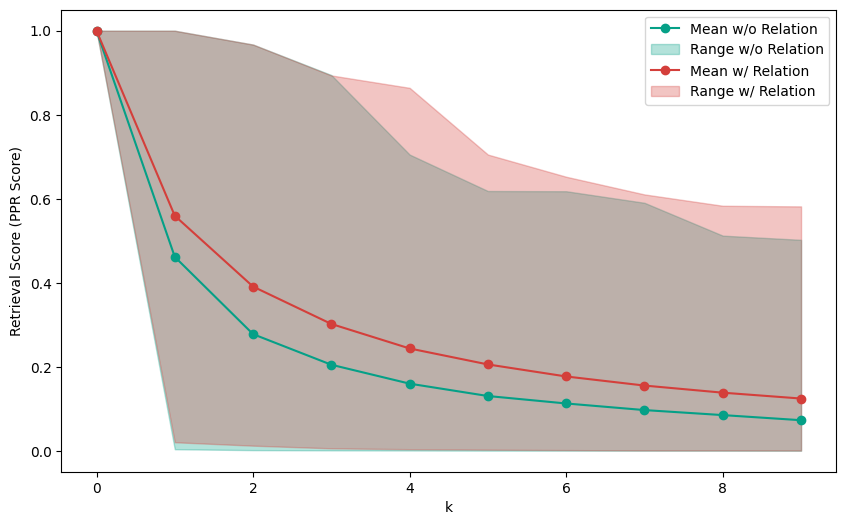

In [70]:
array1 = np.array([np.array(l) for l in cresult1_c.loc[error_indices, 'retrieved_scores'].values])
array2 = np.array([np.array(l) for l in cresult1_er.loc[error_indices, 'retrieved_scores'].values])
array3 = np.array([np.array(l) for l in cresult1_erd.loc[error_indices, 'retrieved_scores'].values])
# plot_with_shaded_area_3(array1, array2, array3, '#05A087', '#D43f3b', "#6D3E99")
plot_with_shaded_area(array1, array2, '#05A087', '#D43f3b')


In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [15]:
def plot_with_shaded_area(array1, array2, color1, color2):
    # Calculate means, upper bounds, and lower bounds for array1
    means1 = array1.mean(axis=0)
    upper_bound1 = np.max(array1, axis=0)
    lower_bound1 = np.min(array1, axis=0)

    # Calculate means, upper bounds, and lower bounds for array2
    means2 = array2.mean(axis=0)
    upper_bound2 = np.max(array2, axis=0)
    lower_bound2 = np.min(array2, axis=0)

    # Create a figure and axis
    plt.figure(figsize=(10, 6))
    
    # Plot means and fill area for array1
    plt.plot(means1, marker='o', label='Mean w/o Relation', color=color1)
    plt.fill_between(range(len(means1)), lower_bound1, upper_bound1, alpha=0.3, 
                     color=mcolors.to_rgba(color1, alpha=0.3), label='Range w/o Relation')

    # Plot means and fill area for array2
    plt.plot(means2, marker='o', label='Mean w/ Relation', color=color2)
    plt.fill_between(range(len(means2)), lower_bound2, upper_bound2, alpha=0.3, 
                     color=mcolors.to_rgba(color2, alpha=0.3), label='Range w/ Relation')

    # Labels and title
    plt.xlabel('k')
    plt.ylabel('Retrieval Score (PPR Score)')
    # plt.title('Top 10 Retrieval ')
    plt.legend()

    plt.savefig('notebooks/rs.svg')

    # Show the plot
    plt.show()


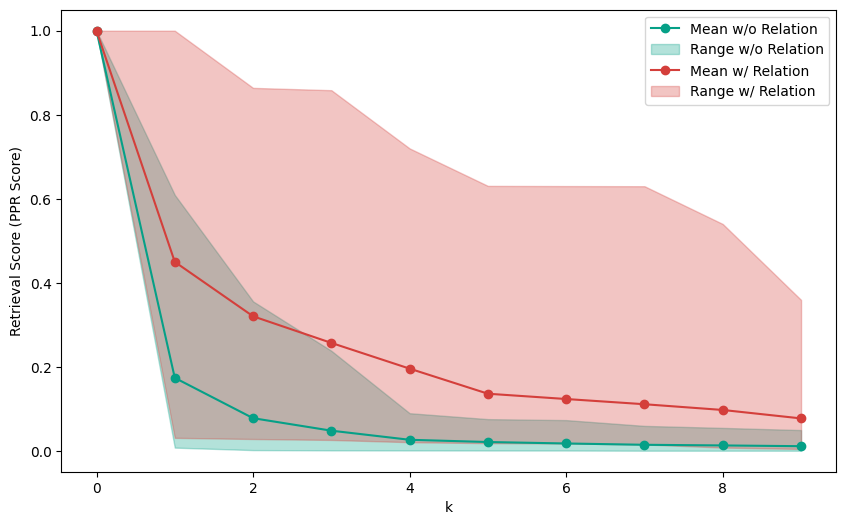

In [16]:
plot_with_shaded_area(retrieved_scores1_array, retrieved_scores2_array, '#05A087', '#D43f3b')

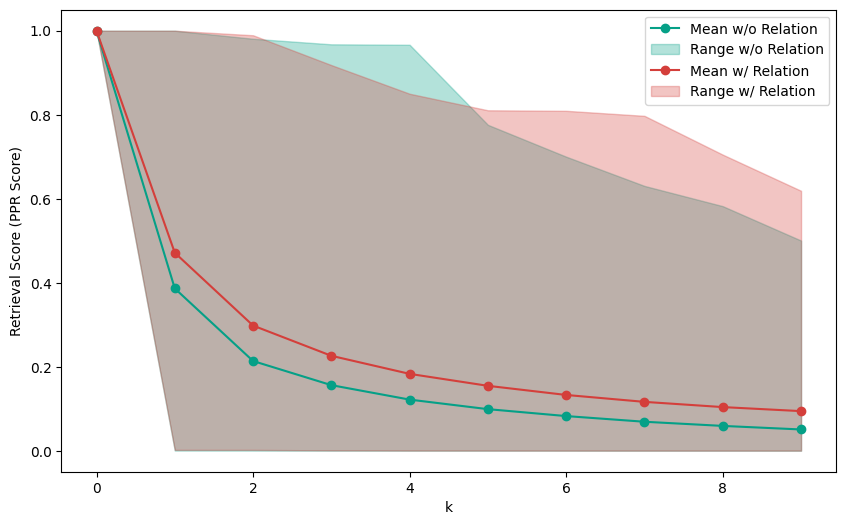

In [17]:
plot_with_shaded_area(
    np.array([np.array(l) for l in result1['retrieved_scores'].values]),
    np.array([np.array(l) for l in result2['retrieved_scores'].values]),
    '#05A087', '#D43f3b'
)

---

what are relations / phrases in these cases?

In [21]:
relation_and_entity_cache = pd.read_csv('output/musique_queries.entity_and_relations.tsv', sep='\t')
named_entity_cache = pd.read_csv('output/musique_queries.entity_and_relations.tsv', sep='\t')

def _extract_phrase(row: pd.Series):
    phrase = set(eval(row['triples']).get('named_entities', []))
    rel_phrases = eval(row['relations']).get('relations', []) if not pd.isna(row['relations']) else []
    try:
        phrase.update(rel_phrases)
    except:
        pass
    return list(phrase)

relation_and_entity_cache_dict = {
    row['question']: _extract_phrase(row) for _, row in relation_and_entity_cache.iterrows()
}
named_entity_cache_dict = {row['question']: eval(row['triples']).get('named_entities', []) for i, row in named_entity_cache.iterrows()}

In [48]:
import json
with open("output/openie_musique_results_ner_gpt-3.5-turbo-1106_11656.json", 'r') as file:
    openie_docs_df = pd.DataFrame(json.load(file)['docs'])
text_to_triple = {f"{row['title']}\n{row['text']}": row['extracted_triples'] for _, row in openie_docs_df.iterrows()}


data = {
    'question': [],
    'relation_and_entity': [],
    'named_entity': [],
    'golden_triples': [],
    'retrieved_doc_triples': [],
    'recall2_2': []
}

def golden_triples(supporting_docs_list, topk=2):
    triples = []
    for i, doc in enumerate(supporting_docs_list[:topk]):
        if isinstance(doc, dict):
            triples.append({'rank': i, 'triples': text_to_triple[f"{doc['title']}\n{doc['paragraph_text']}"]})
        else:
            triples.append({'rank': i, 'triples':text_to_triple[doc]})

    return triples

for i, row in new_df.iterrows():
    q = row['question']
    data['question'].append(q)
    data['relation_and_entity'].append(relation_and_entity_cache_dict.get(q, None))
    data['named_entity'].append(named_entity_cache_dict.get(q, None))
    data['golden_triples'].append(golden_triples(row['supporting_docs'], len(row['supporting_docs'])))
    data['recall2_2'].append(row['recall2_2'])
    data['retrieved_doc_triples'].append(golden_triples(row['retrieved_docs_2'], len(row['supporting_docs'])))

pd.set_option('display.max_colwidth', None)
pd.DataFrame(data).to_csv('notebooks/errors.csv')
